# Classification

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [20]:
type(y)

numpy.ndarray

In [23]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [24]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [26]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

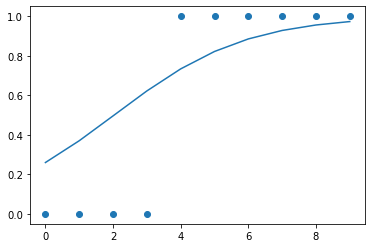

In [30]:
plt.scatter(x,y)
prob = model.predict_proba(x)[:,1]
plt.plot(x, prob)

In [31]:
model.score(x,y)

0.9

actual -> [0,0,0,0,1,1,1,1,1,1]
predict -> [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

In [34]:
cm = confusion_matrix(y, model.predict(x))

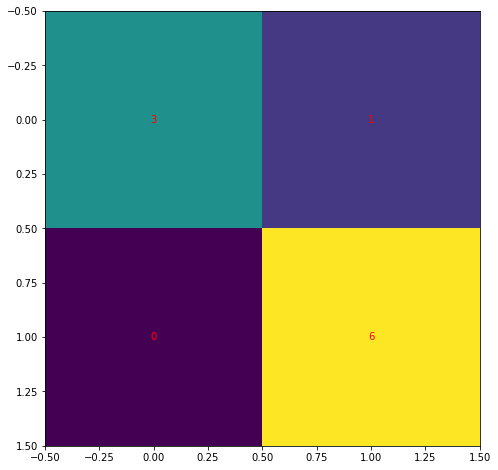

In [37]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

<AxesSubplot:>

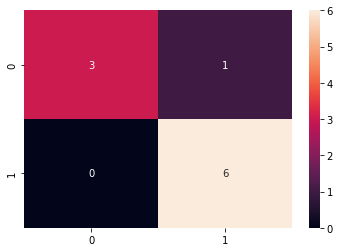

In [42]:
sns.heatmap(cm, annot=True)

In [45]:
cr = classification_report(y, model.predict(x))

In [46]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Improve the model

In [53]:
model2 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)

In [54]:
model2.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [55]:
model2.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

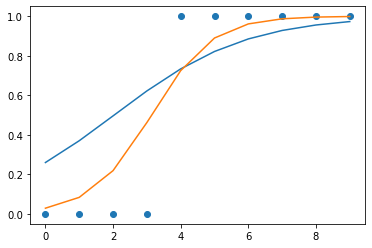

In [56]:
plt.scatter(x,y)
prob = model.predict_proba(x)[:,1]
prob2 = model2.predict_proba(x)[:,1]
plt.plot(x, prob, prob2)

In [58]:
cr2 = classification_report(y, model2.predict(x))
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Try with Dataset

In [68]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
x, y = load_digits(return_X_y=True)

In [64]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [65]:
X_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [71]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [72]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [73]:
LogisticRegression(C=0.05,  class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [74]:
X_test = scaler.transform(x_test)

In [85]:
y_pred = model.predict(X_test)

In [86]:
model.score(x_train, y_train)

0.964509394572025

In [87]:
model.score(X_test, y_test)

0.9416666666666667

In [88]:
cmd = confusion_matrix(y_test, y_pred)
print(cmd)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  1  1]
 [ 1  1 33  1  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  1 33  0]
 [ 0  0  0  1  0  1  0  2  1 36]]


<AxesSubplot:>

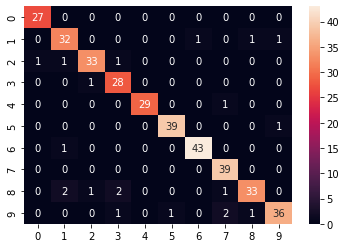

In [89]:
sns.heatmap(cmd, annot=True)

In [80]:
crd = classification_report(y_test, y_pred)
print(crd)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.75      0.94      0.84        35
           2       1.00      0.78      0.88        36
           3       1.00      0.90      0.95        29
           4       1.00      0.77      0.87        30
           5       1.00      0.95      0.97        40
           6       1.00      0.91      0.95        44
           7       0.97      0.87      0.92        39
           8       0.56      0.97      0.71        39
           9       1.00      0.73      0.85        41

    accuracy                           0.88       360
   macro avg       0.92      0.88      0.89       360
weighted avg       0.92      0.88      0.89       360



# KNN

In [91]:
w = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overvcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcsat', 'Overcast', 'Rainy']
t = ['Hot','Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
p = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [93]:
from sklearn import preprocessing

# Label encoder adalah proses ubah label kata jdi numerik
le = preprocessing.LabelEncoder()

we = le.fit_transform(w)
print(we)

[4 4 0 3 3 3 2 4 4 3 4 1 0 3]


In [98]:
te = le.fit_transform(t)
label = le.fit_transform(p)
print(te)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [100]:
# combine some columns to be one set data
features =  list(zip(we, te))
print(features)

[(4, 1), (4, 1), (0, 1), (3, 2), (3, 0), (3, 0), (2, 0), (4, 2), (4, 0), (3, 2), (4, 2), (1, 2), (0, 1), (3, 2)]


In [116]:
# generating models
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)

predicted = model.predict([[0,2]])
print(predicted)

[1]


# Wine Dataset

In [103]:
from sklearn import datasets

wine = datasets.load_wine()

In [105]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [106]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [107]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [109]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [110]:
type(wine)

sklearn.utils.Bunch

In [112]:
print(wine.data.shape)

(178, 13)


In [113]:
print(wine.target.shape)

(178,)


In [117]:
# split data
X_train, y_train, x_test, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)
# training
knn.fit(X_train, y_train)

# predict 
y_pred = knn.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [124, 54]

In [119]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [54, 360]